# Lab

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt
from matplotlib.backends.backend_pdf import PdfPages

In [231]:
data1=pd.read_excel("data.xlsx")[1:]
data1

,Column2,Column3,Column4,Column5,Column6
1,1,3689,0,0.135,-0.06
2,2,3690,0,9.999,-0.055
3,3,3700.5,0,9.999,-0.032
4,4,3704,0,0.078,-0.013
5,5,3705,0,0.077,-0.011
...,...,...,...,...,...
530,0,8655.7,1,0.089,-0.016
531,0,8682.7,1,9.999,-0.086
532,0,8683.7,1,9.999,-0.081
533,0,8808.7,1,0.067,0.008


I don't see why I should take less points when I could take all and plot them.

In [244]:
for index,row in data1.iterrows():
#          print(index,row)
    if row["Column5"]>9.9 or row["Column6"]>9.9:
        data1=data1.drop(index)
#         continue
#     if row["Column5"]<-9.9 or row["Column6"]<-9.9:
#         data1=data1.drop(index)
        
x1=np.asarray(data1["Column3"],dtype=np.float32)
y1= np.asarray(data1["Column5"],dtype=np.float32)
y2= np.asarray(data1["Column6"],dtype=np.float32)

# data1

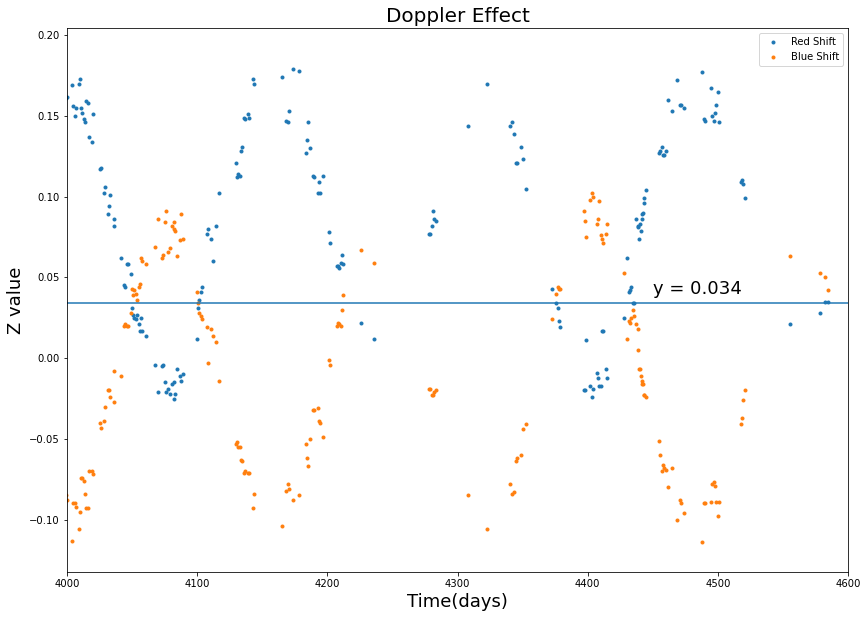

In [267]:
plt.figure( figsize=(14,10) )
# plt.ylim(-0.21,0.2)
plt.xlim(4000,4600)
plt.plot(x1,y1,".",label="Red Shift")
plt.plot(x1,y2,".",label="Blue Shift")
plt.axhline(y=0.034)
plt.text(4450,0.040,"y = 0.034",fontsize=18)
plt.legend()
plt.xlabel("Time(days)",fontsize=18)
plt.ylabel("Z value",fontsize=18)
plt.title("Doppler Effect",fontsize=20)

# pp = PdfPages('multipage.pdf')
# plt.savefig("save1.pdf")
# pp.savefig()
plt.savefig("save1.png")

In [268]:
x1[65:230],y1[82:245]

(array([4011.9, 4013. , 4013.9, 4014.9, 4015.9, 4016.8, 4019. , 4020. ,
        4025. , 4026. , 4028.6, 4029.6, 4031.5, 4032. , 4032.9, 4036. ,
        4036.5, 4041.8, 4043.9, 4044.9, 4045.9, 4047. , 4048.9, 4050. ,
        4051. , 4051.8, 4052.9, 4054. , 4055. , 4055.9, 4056.9, 4057.9,
        4060.9, 4067.8, 4070. , 4073. , 4074. , 4075. , 4075.8, 4077.8,
        4078.8, 4080.9, 4081.9, 4082.4, 4082.8, 4084.8, 4086.8, 4087.8,
        4088.9, 4099.8, 4100.8, 4101.8, 4102.7, 4103.7, 4107.5, 4108.5,
        4110.7, 4111.8, 4114.8, 4116.4, 4129.7, 4130.5, 4131.5, 4132.7,
        4133.7, 4134.6, 4135.7, 4136.7, 4138.7, 4139.8, 4142.7, 4143.7,
        4165.3, 4168.6, 4169.5, 4170.6, 4173.6, 4178.3, 4183.3, 4184.3,
        4185.3, 4186.3, 4188.6, 4189.6, 4192.6, 4193.6, 4194.6, 4196.6,
        4201.6, 4202.3, 4207.2, 4208.3, 4209.3, 4210.3, 4211.2, 4212.2,
        4226.2, 4235.6, 4278.1, 4279.1, 4280.1, 4281.1, 4282.1, 4283.1,
        4308.1, 4323. , 4340.6, 4342. , 4343. , 4345. , 4346. , 

In [269]:
def mymodel(x, psi, phi, omega):
    y =  1.036 * (1- 0.2613 * (np.sin(phi) * np.cos(psi)-np.sin(psi) * np.cos(phi)* np.cos(omega * x)))-1
    return y

p1, cov1 = opt.curve_fit( mymodel, x1[65:230], y1[65:230], bounds = ((-np.pi/2,-np.pi/2,0.035),(np.pi/2,np.pi/2,0.0455)) )
p2, cov2 = opt.curve_fit( mymodel, x1[65:230], y2[65:230], bounds = ((-np.pi/2,-np.pi/2,0.035),(np.pi/2,np.pi/2,0.0455)) )
p1,p2

(array([-0.35306893, -0.18808098,  0.03853391]),
 array([0.35358275, 0.19219505, 0.038534  ]))

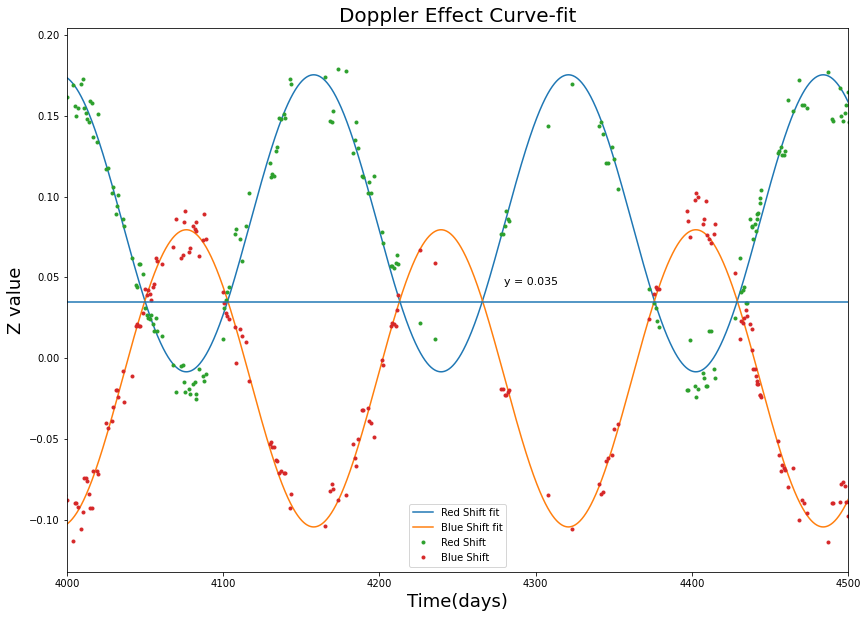

In [273]:
# plt.ylim(-0.21,0.2)
plt.figure( figsize=(14,10) )
plt.xlim(4000,4500)
x2=np.arange(4000,5000, 0.1)
plt.plot(x2,mymodel(x2,*p1),"-",label="Red Shift fit")
plt.plot(x2,mymodel(x2,*p2),"-",label="Blue Shift fit")
plt.plot(x1,y1,".",label="Red Shift")
plt.plot(x1,y2,".",label="Blue Shift")
plt.axhline(y=0.035)
plt.text(4280,0.045,"y = 0.035",fontsize=11)
plt.legend()
plt.xlabel("Time(days)",fontsize=18)
plt.ylabel("Z value",fontsize=18)
plt.title("Doppler Effect Curve-fit",fontsize=20)

# plt.savefig("save2.pdf")
# pp.savefig()
# pp.close()
plt.savefig("save2.png")